In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os

In [2]:
ROOT = '/Volumes/Samsung_T5/Thesis'

ERA = os.path.join(ROOT, 'timeseries', 'ERA')
ERA5 = os.path.join(ROOT, 'timeseries', 'ERA5')
ECE = os.path.join(ROOT, 'timeseries', 'EC-Earth')

In [3]:
def load(path: str):
    df = pd.read_csv(path, names=["date", "series"])

    # Set Date as Index
    df["date"] = pd.DatetimeIndex(df["date"])
    df = df.set_index("date")

    # Remove Hour Offset, if any
    df.index -= pd.Timedelta(df.index[0].hour, 'h')

    return df

In [6]:
# ERA Interim is too dry in summers...

0.941386762339452


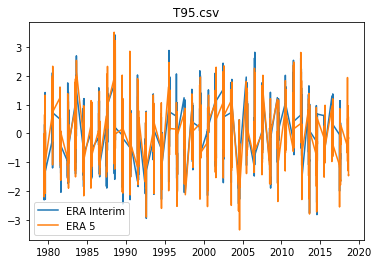

0.7528828781200069


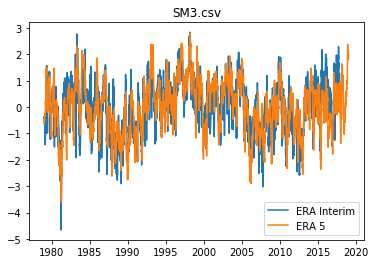

0.822057912549922


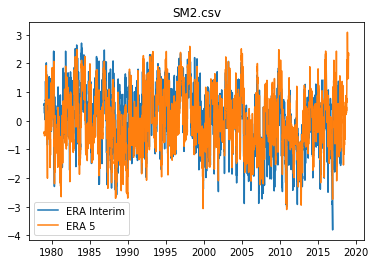

0.8506649282030885


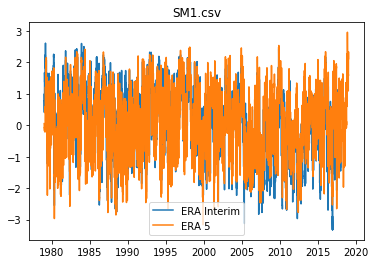

0.9824221991583607


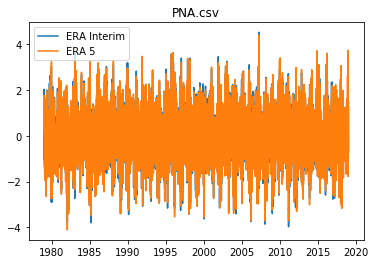

0.7955791573803291


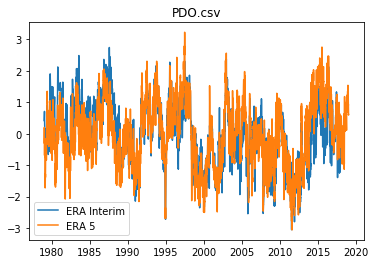

0.9768920916799115


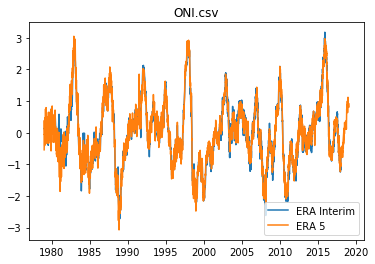

In [5]:
INDEX = slice(None, None)

for path in os.listdir(ERA):
    era = load(os.path.join(ERA, path))[INDEX]
    era5 = load(os.path.join(ERA5, path))[INDEX]
    
    print(era.series.corr(era5.series))
    
    plt.plot(era, label="ERA Interim")
    plt.plot(era5, label="ERA 5")
    plt.title(path)
    plt.legend()
    plt.show()